In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/predictions2.tsv', sep="\t")
print(df)

    project_ids  sample_ids genders  doses  target  prediction  \
0     SRP161461  SRR7817611    male    0.0       0           1   
1     SRP161461  SRR7817612    male    0.0       0           1   
2     SRP161461  SRR7817613    male    0.0       0           0   
3     SRP161461  SRR7817614    male    0.0       0           0   
4     SRP161461  SRR7817615    male    0.0       0           1   
..          ...         ...     ...    ...     ...         ...   
378   SRP090688  SRR4317656    male   30.0       1           1   
379   SRP090688  SRR4317657    male   30.0       1           1   
380   SRP090688  SRR4317658    male   30.0       1           1   
381   SRP090688  SRR4317659    male   30.0       1           1   
382   SRP090688  SRR4317660    male   30.0       1           1   

     confidence_class_0  confidence_class_1  
0              0.254143            0.745857  
1              0.341972            0.658028  
2              0.540196            0.459804  
3              0.649136

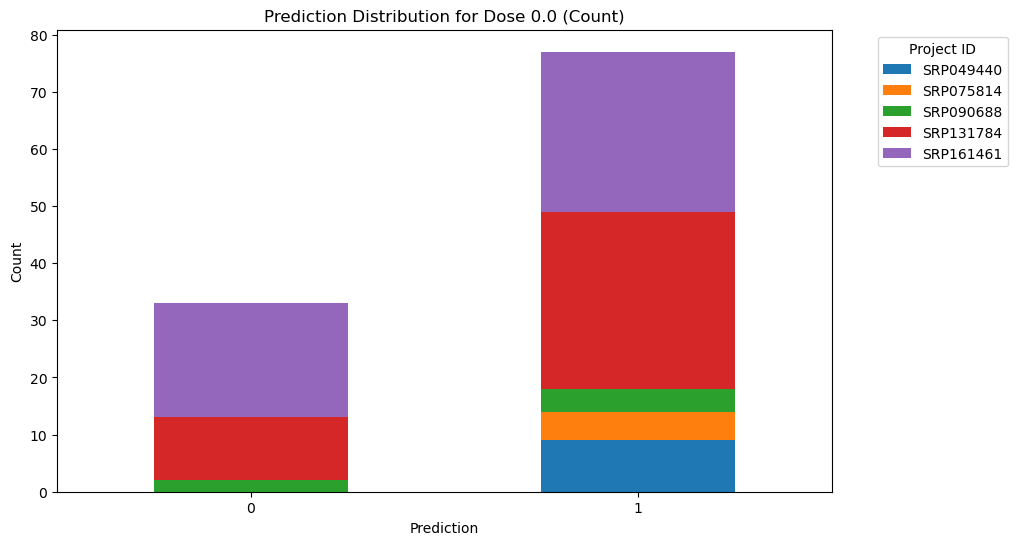

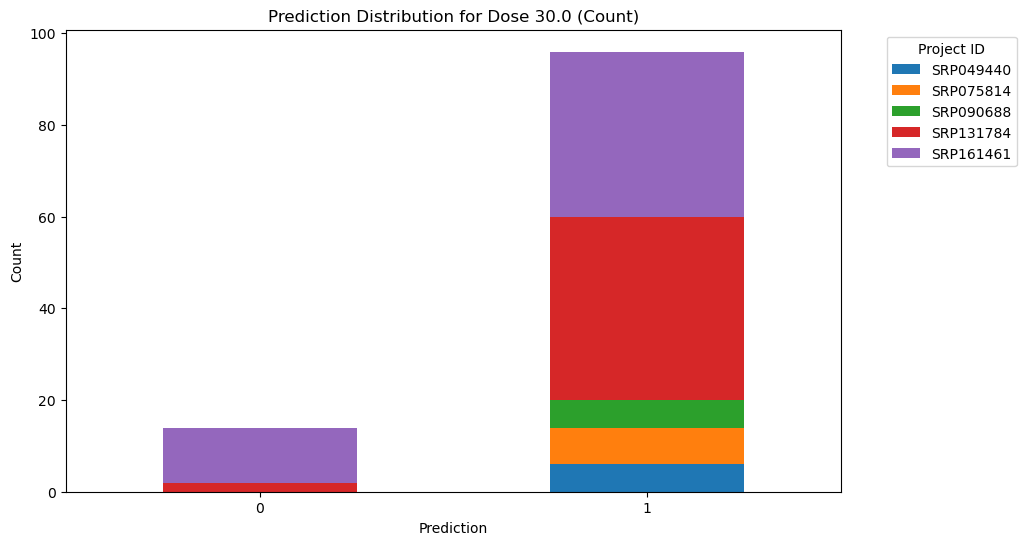

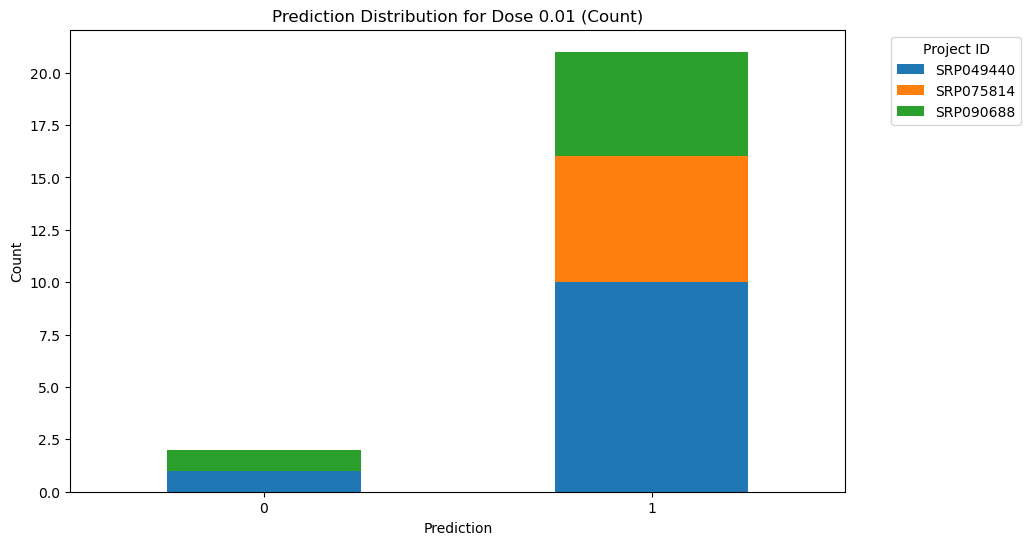

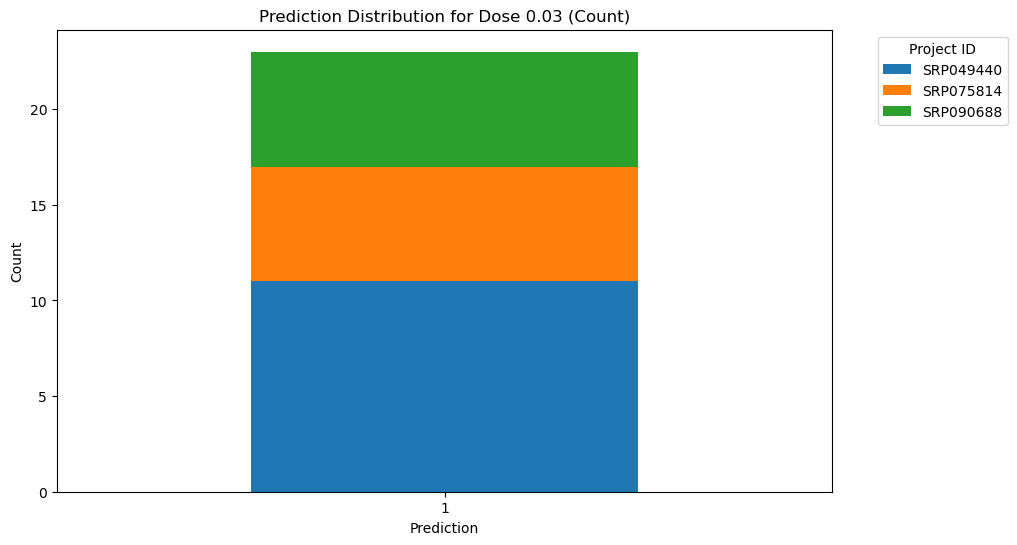

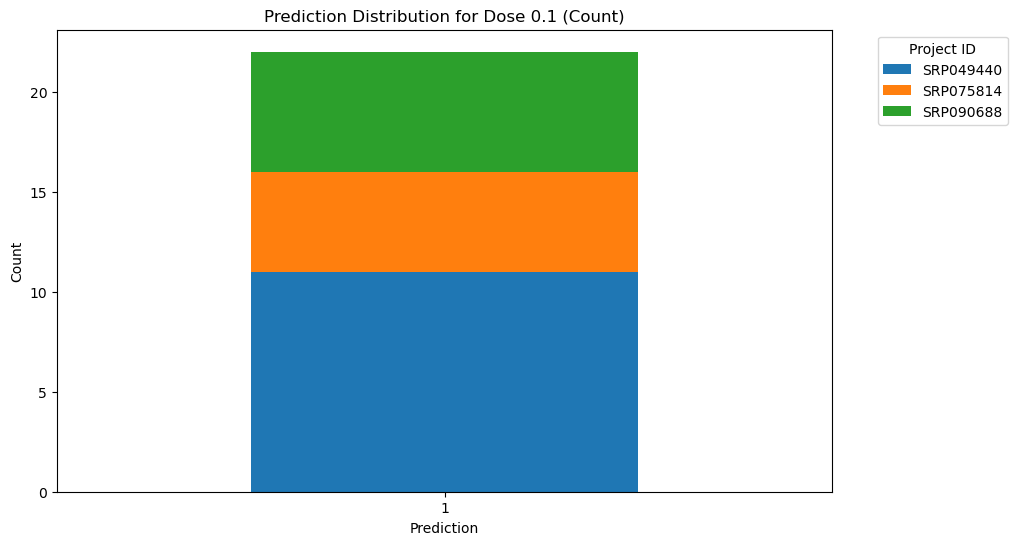

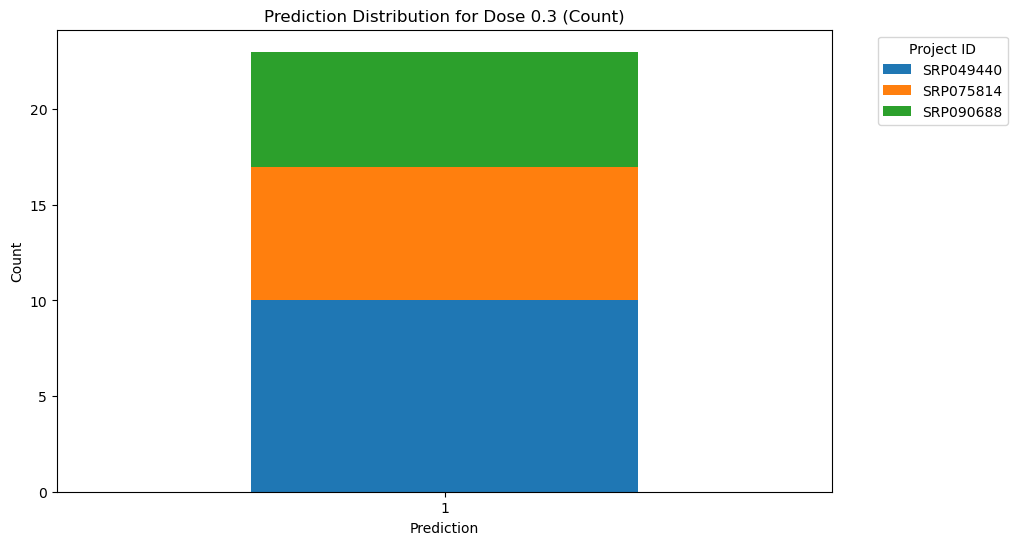

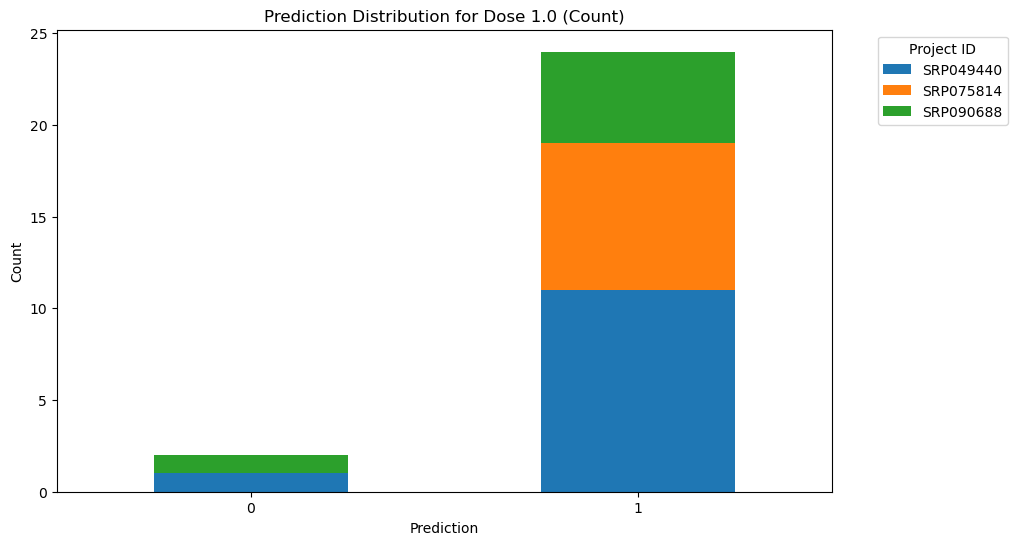

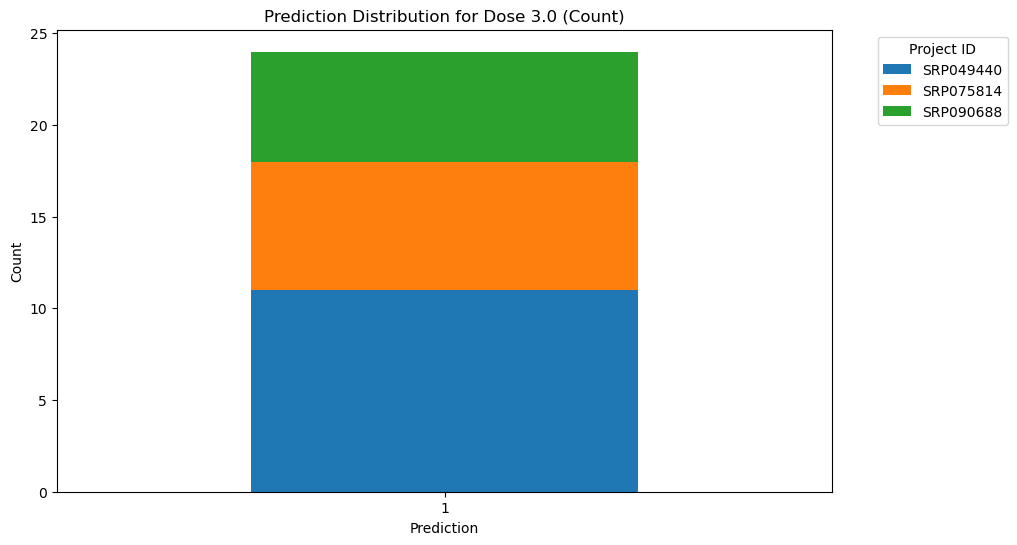

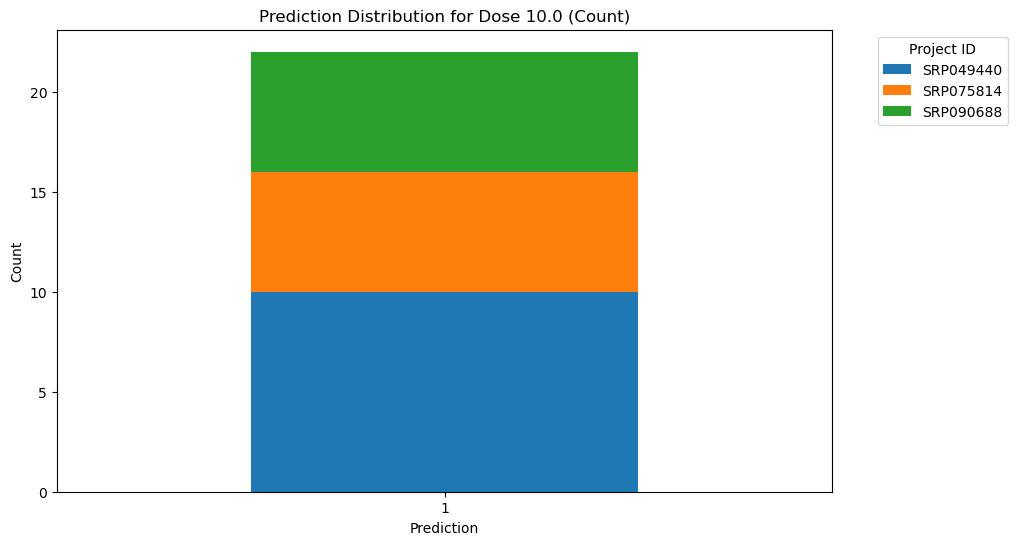

In [4]:
for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    prediction_counts = subset.groupby(['prediction', 'project_ids']).size().unstack(fill_value=0)
    
    # 绘制堆叠柱状图
    ax = prediction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Prediction Distribution for Dose {dose} (Count)')
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.show()


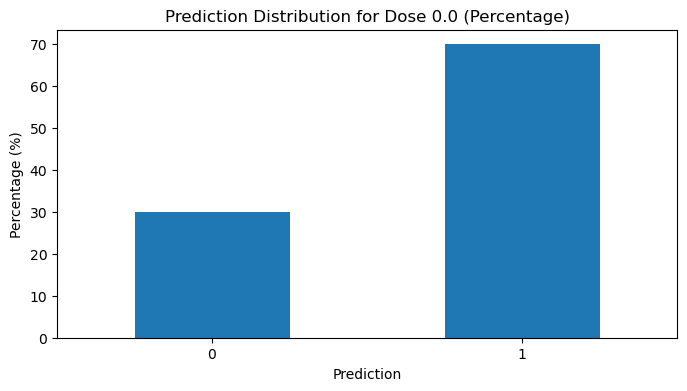

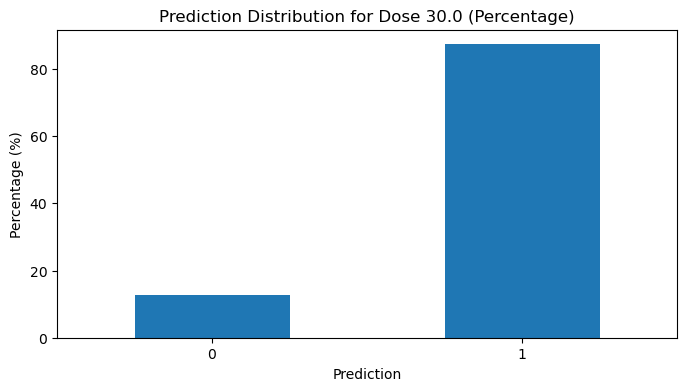

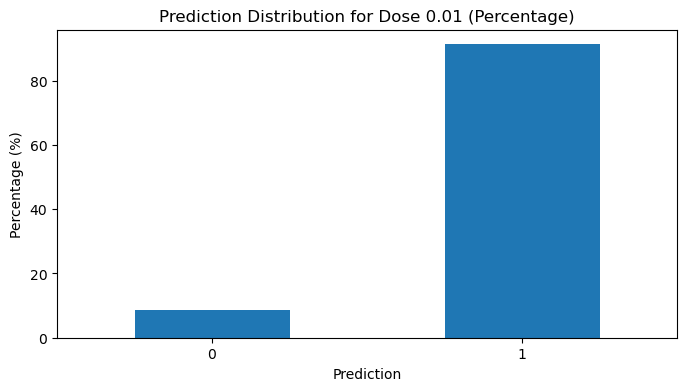

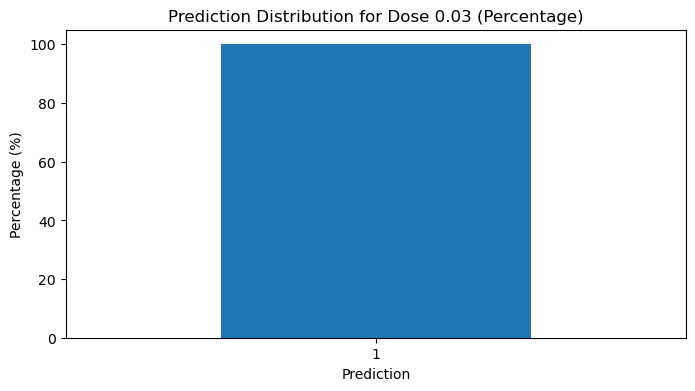

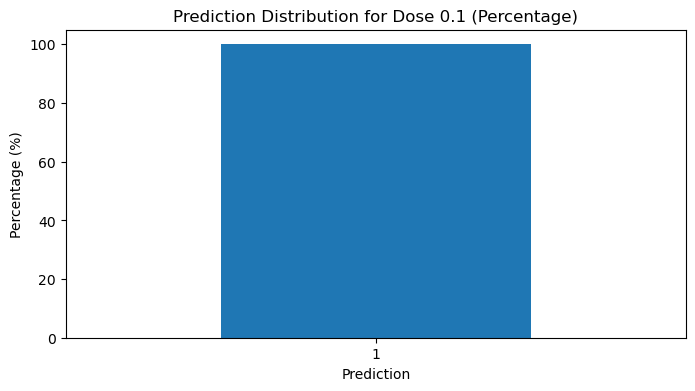

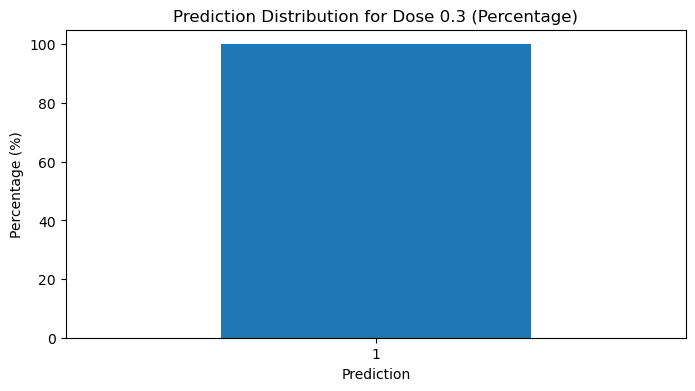

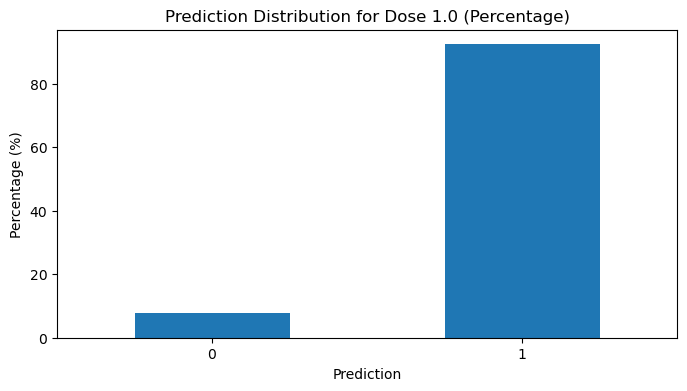

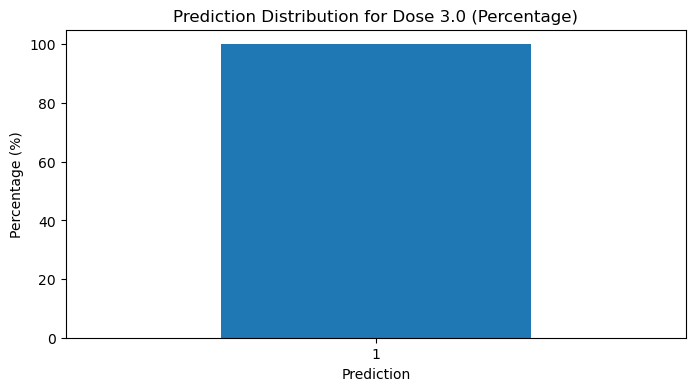

In [5]:
for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    plt.figure(figsize=(8, 4))
    # Calculate percentage and plot
    (subset['prediction'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar')
    plt.title(f'Prediction Distribution for Dose {dose} (Percentage)')
    plt.xlabel('Prediction')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=0)
    plt.show()


In [6]:
ig_0 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/2ig_0.txt', header=None, sep="\t")
ig_1 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/2ig_1.txt', header=None, sep="\t")
edges = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/GEO_model_training/input/edgeLabels.csv', header=None, sep=" ")
result = pd.concat([ig_0, ig_1, edges], axis=1)
result.columns = ["ig_0", "ig_1", "start", "end"]
print(result)

          ig_0      ig_1          start            end
0     0.015294  0.005412  R-MMU-9613507  R-MMU-9613545
1     0.003430  0.000725  R-MMU-9613545  R-MMU-9613562
2     0.006428  0.008657  R-MMU-9641089  R-MMU-9641096
3     0.007944  0.006321  R-MMU-9641096  R-MMU-9641111
4     0.025896  0.023402  R-MMU-9641111  R-MMU-9641127
...        ...       ...            ...            ...
6509  0.018764  0.026719  R-MMU-8856808  R-MMU-8856813
6510  0.005759  0.002856  R-MMU-8868651  R-MMU-8868648
6511  0.001845  0.004373  R-MMU-8868648  R-MMU-8868661
6512  0.007227  0.005631  R-MMU-8868660  R-MMU-8868658
6513  0.014318  0.015215  R-MMU-8863721  R-MMU-8863723

[6514 rows x 4 columns]


In [7]:
import pandas as pd

sorted_by_ig0 = result.sort_values(by='ig_0', ascending=False)

sorted_by_ig1 = result.sort_values(by='ig_1', ascending=False)

sorted_by_ig0.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/2sorted_by_ig0.csv', sep='\t', index=False)
sorted_by_ig1.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/2sorted_by_ig1.csv', sep='\t',index=False)

